In [1]:
from model_phantom_DB import *
from linares_plot import * 
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'png' ## 'svg'

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import pandas as pd


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


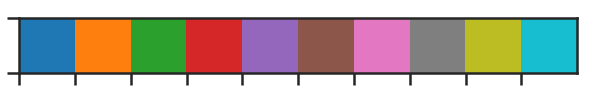

In [2]:
#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(100/2) ;


nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+57) )/360)
p_dist2 = int((N * (90+170) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [3]:
def hemap(an, stimulation, order):
    dims=np.shape(an[4])
    stimon = 100/2
    stimoff = 100/2 + floor(100/2) ;
    stim2on = 1000/2
    stim2off = 1000/2 + floor(100/2) ;  
    
    RE_sorted=flipud(an[4])
    ax = sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=18,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 6, 12, 18], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    
    if order==1:
        plt.gca().plot([stimon, stimon+400], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=3) 
    if order==2:
        plt.gca().plot([500, 900], [p_dist, p_dist], ls='--', color =ltc, linewidth=lw_t) 
    #   
    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    #plt.gca().set_yticklabels(['0','','$^\pi$', '', '2$^\pi$'])
    plt.gca().set_yticklabels(['0','','180', '', '360'])
    
    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(570, -45)
    
    ##line stims       
    plt.plot([0, stimon], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stimon, stimon], [-15, -40], 'k-', linewidth=3)
    plt.plot([stimon, stimoff], [-40, -40], 'k-', linewidth=3)
    plt.plot([stimoff, stimoff], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stimoff, stim2on], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stim2on, stim2on], [-15, -40], 'k-', linewidth=3)
    plt.plot([stim2on, stim2off], [-40, -40], 'k-', linewidth=3)
    plt.plot([stim2off, stim2off], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stim2off, dims[1]], [-15, -15], 'k-', linewidth=3)
    #time
    plt.plot([dims[1]-500, dims[1]], [540, 540], 'k-', linewidth=3)
    plt.text(dims[1]-300, 600, '1s', fontsize=20)
    # stimulation
    if stimulation=='ON':
        plt.text(dims[1]-300, 70, stimulation, weight= 'heavy', color='w', fontsize=20)
    if stimulation=='OFF':
        plt.text(dims[1]-300, 70, stimulation, weight= 'heavy', color='k', fontsize=20)

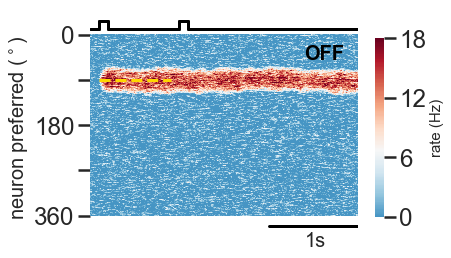

In [18]:
### OFF 

fee=1
fei=1
fie=1
fii=1

%config InlineBackend.figure_format = 'png' ## 'svg'

off_far_1= model(totalTime= 3000, targ_onset_1=100, targ_onset_2=4000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(off_far_1, stimulation='OFF', order=1)
plt.show()

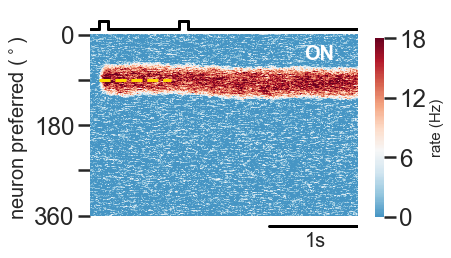

In [19]:
### ON 

on_far_1= model(totalTime=3000, targ_onset_1=100, targ_onset_2=4000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)


hemap(on_far_1, stimulation='ON', order=1)
plt.show()

### NB stimulation decreases tuning???

![NB stim changes tuning](loss_tuning_paper_figure.png)

In [4]:
def decode_rE(rE, a_ini=0, a_fin=360, N=512):
    #Population vector for a given rE
    # return ( angle in radians, absolut angle in radians, abs angle in degrees )
    N=len(rE)
    Angles = np.linspace(a_ini, a_fin, N) 
    angles=np.radians(Angles)
    rE = np.reshape(rE, (1,N))
    R = numpy.sum(np.dot(rE,exp(1j*angles)))/numpy.sum(rE) ## finding it with imagianry numbers
    angle_decoded = np.degrees(np.angle(R))
    if angle_decoded<0:
        angle_decoded = 360+angle_decoded
    
    return angle_decoded


In [57]:
#### centrando al decoded angle con el population vector, ver el espectro de firing rates

In [65]:
centered_RE_off = []
centeres_off = [decode_rE( flipud(off_far_1[4][:, i ]) ) for i in range(np.shape(off_far_1[4])[1]) ]

for i in range(np.shape(off_far_1[4])[1]):
    to_roll = int(centeres_off[i] * N/360)
    rE = flipud(off_far_1[4][:, i ])
    rE_rolled = np.roll(rE, -to_roll) ##to 0
    rE_rolled_0 = np.roll(rE_rolled, int(N/2)) ## al medio
    centered_RE_off.append(rE_rolled_0)

    
########################################################


centered_RE_on = []
centeres_on = [decode_rE( flipud(on_far_1[4][:, i ]) ) for i in range(np.shape(on_far_1[4])[1]) ]

for i in range(np.shape(on_far_1[4])[1]):
    to_roll = int(centeres_on[i] * N/360)
    rE = flipud(on_far_1[4][:, i ])
    rE_rolled = np.roll(rE, -to_roll) ##to 0
    rE_rolled_0 = np.roll(rE_rolled, int(N/2)) ## al medio
    centered_RE_on.append(rE_rolled_0)

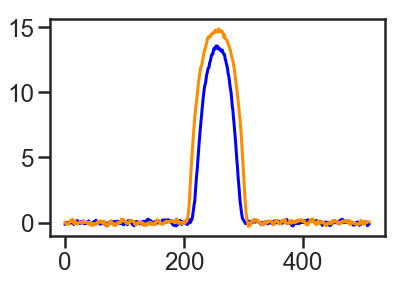

In [66]:
plt.plot(np.mean(np.array(centered_RE_off), axis=0), color='blue')
plt.plot(np.mean(np.array(centered_RE_on), axis=0), color='darkorange')

In [ ]:
#### provar ROC, bump más ancho hace más errores??

In [5]:
simulations_ON_rE = 'C:\\Users\\David\\Desktop\\IDIBAPS\\simulations_christos\\simuls_on_class_re.xlsx'
simulations_ON_targets = 'C:\\Users\\David\\Desktop\\IDIBAPS\\simulations_christos\\simuls_on_class_targets.xlsx'

simulations_OFF_rE = 'C:\\Users\\David\\Desktop\\IDIBAPS\\simulations_christos\\simuls_off_class_re.xlsx'
simulations_OFF_targets = 'C:\\Users\\David\\Desktop\\IDIBAPS\\simulations_christos\\simuls_off_class_targets.xlsx'


In [6]:
N=512
ch_size = 1
ch = int(360/ch_size)
reps_=100

In [7]:
#### ROC for ON
X_on= pd.read_excel(simulations_ON_rE).values
y_on=pd.read_excel(simulations_ON_targets).values

In [8]:
#### ROC for OFF
X_off= pd.read_excel(simulations_OFF_rE).values
y_off=pd.read_excel(simulations_OFF_targets).values

In [14]:
X_ON = X_on[:1000]
y_ON = y_on[:1000]

In [35]:
y_on=pd.read_excel(simulations_ON_targets).values

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [41]:
y_on=pd.read_excel(simulations_ON_targets).values
y_ON = y_on[:1080]
y_ON[0::2] = y_ON[0::2] +1 
X_ON = X_on[:1080]


In [44]:
#### ROC for ON

#####np.random.shuffle(y)

# Binarize the output
y= label_binarize(y_ON, classes=np.arange(1, 360,2))
n_classes = y_ON.shape[1]

random_state = np.random.RandomState(0)
n_samples, n_features = X_ON.shape


X_train, X_test, y_train, y_test = train_test_split(X_ON, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 147 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 166 is present in all training examples.
  str(classes[c]))


In [46]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC NB stimulation')
plt.legend(loc="lower right", fontsize=15)
plt.show()

KeyError: 2

<Figure size 432x288 with 0 Axes>

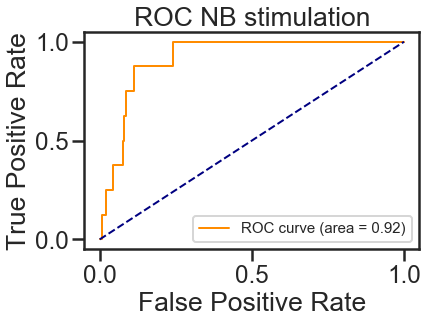

In [22]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC NB stimulation')
plt.legend(loc="lower right", fontsize=15)
plt.show()

In [19]:
fpr.keys()

dict_keys([0, 'micro'])

In [20]:
tpr.keys()

dict_keys([0, 'micro'])

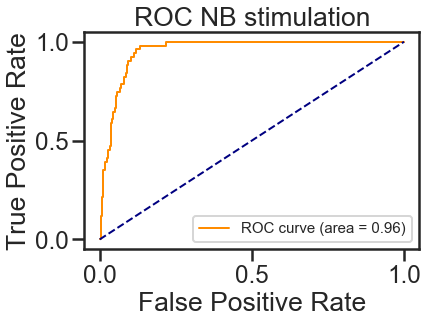

In [7]:
#### ROC for ON

#####np.random.shuffle(y)

# Binarize the output
y= label_binarize(y, classes=np.arange(0, 360,ch_size))
n_classes = y.shape[1]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC NB stimulation')
plt.legend(loc="lower right", fontsize=15)
plt.show()

In [8]:
#### ROC for OFF
X= pd.read_excel(simulations_OFF_rE).values
y=pd.read_excel(simulations_OFF_targets).values

In [ ]:
#####np.random.shuffle(y)

# Binarize the output
y= label_binarize(y_off, classes=np.arange(0, 360,ch_size))
n_classes = y.shape[1]

random_state = np.random.RandomState(0)
n_samples, n_features = X_off.shape


X_train, X_test, y_train, y_test = train_test_split(X_off, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC control conditions')
plt.legend(loc="lower right", fontsize=15)
plt.show()

In [70]:
# 1a pregunta: el population vector me puede indicar cuando el bump es estrecho o ancho?


2.9634732740137175

In [72]:
np.std(centeres_off[50:100])

29.061935002870012

In [78]:
np.std(centeres_on[80:100] )

0.8115762468780492

In [79]:
np.std(centeres_off[80:100])

1.7560060345235409

In [80]:
centeres_on[80:100] 

[91.86759627138781,
 91.47028988367245,
 92.0425149129812,
 91.87182330182307,
 91.63566172880596,
 90.66047780543175,
 90.1200247261582,
 90.23728830073266,
 90.74972709081588,
 90.952943974548,
 91.35680141030483,
 91.22169246274974,
 91.18572589309966,
 92.01153279299272,
 91.55758303955753,
 89.9965894273958,
 89.07530793684926,
 89.97795718218958,
 90.32947170685529,
 90.11461998337806]

In [81]:
centeres_off[80:100]

[93.7304370367383,
 90.61709379592087,
 90.71205101846104,
 91.30888523133534,
 89.91995800821208,
 90.07815961799157,
 91.76887124020188,
 92.51337432290578,
 94.14916653645507,
 93.13198946000169,
 93.793610454186,
 94.11263392025079,
 94.36513604844606,
 95.56486380611442,
 94.85048247579736,
 94.30447972143648,
 95.06422216578456,
 95.09093418566664,
 94.59716003075131,
 93.2258874263833]

In [86]:
targets_on = np.array([int(centeres_on[i]) for i in range(len(centeres_on))] )
targets_off = np.array([int(centeres_off[i]) for i in range(len(centeres_off))] )

In [91]:
centered_RE_on = np.array(centered_RE_on)

In [121]:
targets_on = np.array([int(centeres_on[80:][i]) for i in range(len(centeres_on[80:]))] )
centered_RE_on = np.array(centered_RE_on[80:, :])

X = centered_RE_on
y = targets_on
y = label_binarize(y, classes=range(0, 360))

print( np.shape(X) )
print( np.shape(y) )


(1420, 512)
(1420, 360)


In [133]:
np.arange(0, 360, 10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [277]:
N=512
ch_size = 1
ch = int(360/ch_size)
reps_=10

In [ ]:
rEs_on = []
targets = []

for iPos in np.arange(0, 360, ch_size):
    for n in range(reps_):
        on_far_X= model(totalTime=1000, targ_onset_1=0, targ_onset_2=4000, angle_target_i=iPos, presentation_period=100,
                   angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
                   GEE=0.068*fee,
                   GII= 0.13*fii,
                   GEI=0.13*fei,
                   GIE=0.042*fie, 
                   sigE=7., sigI=5., k_noise=0.6,           
                   kappa_E=45, 
                   kappa_I=0.3, 
                   kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
                   plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
                   phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
        targets.append(iPos)
        rEs_on.append(on_far_X[3])


# hemap(on_far_1, stimulation='ON', order=1)
# plt.show()

In [ ]:
X = np.array(rEs_on).reshape(ch*reps_, N)
y = np.array(targets)
#np.random.shuffle(y)


# Binarize the output
y= label_binarize(y, classes=np.arange(0, 360,ch_size))
n_classes = y.shape[1]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

In [ ]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))

In [ ]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right", fontsize=15)
plt.show()

In [180]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 10 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 11 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 13 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anac

In [152]:
np.shape(X)

(36, 512, 1)

In [153]:
np.shape(y)

(36, 36)

In [149]:
y=label_binarize(y, classes=np.arange(0, 360,10))
y

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

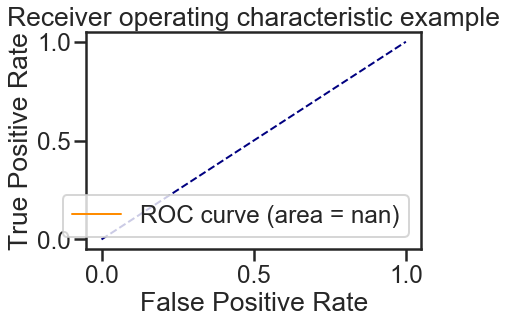

In [136]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [122]:
# Import some data to play with

X = centered_RE_on
y = targets_on

# Binarize the output
y = label_binarize(y, classes=range(0, 360))
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anacond

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 103 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 104 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 105 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 106 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 107 is present in all training examples.
  str(classes[c]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 108 is present in all training examples.
  str(classes[c]))
C:\Users\D

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive

In [123]:
y_score

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

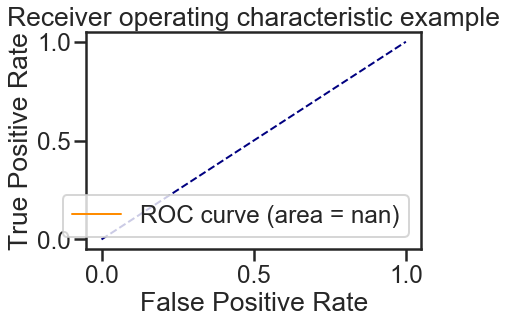

In [124]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [172]:
np.shape(X)

(150, 804)

In [173]:
np.shape(y)

(150, 3)

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

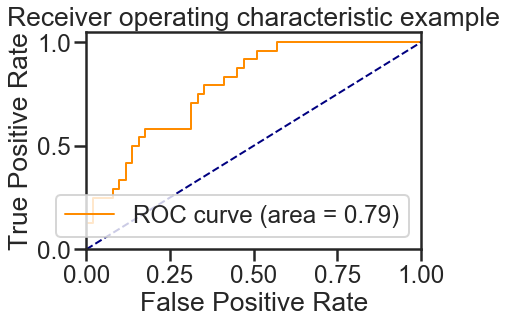

In [83]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()